# The Clustering Project using Zillow data

## *General background about the project*:

> Clustering is an unsupervised machine learning methodology. It is used to group and identify similar observations when we do not have labels that identify the groups.

>It is often a preprocessing or an exploratory step in the data science pipeline

> In this project, I am using clusters to help my exploration, understanding, and modeling of the data.

## *Goals*

>Use clusters to help my exploration, understanding, and modeling of the Zillow data using the <ins>logerror</ins> column as a 'target' and determining the best suitable clusters that impact <ins>logerror</ins>

>Logerror is the log of the error between actual home price and estimated home price


## *Executive Summary*

>The original variables are not useful in detecting changes in logerror

>The value cluster seemd to be promissing with the lowest set of SSEs but that is not enough to make some conclusions since I was not able to run a model. 

>I planned on using a OLS, LASSOLARS, and a Tweedie Regressor

## *Findings*

>Physical position: latitude, longitude, Los_Angeles, Orange, Ventura,

>Value: building_tax_value, parcel_tax_value, land_tax_value, tax_rate, value_per_sqft

>Home features: bathrooms, bedrooms, lot_sqft

## The pipeline process

### ACQUIRE:

**Objective**

>Get the right tables through a SQL query as a dataframe and 
write it to a csv file locally in order to avoid long queries. 
Since the data does not change this is safe and the result will be as if I were using the Codeup database.

>This includes displaying and summariziing statiscally parts or the entirety of the data.

>Write my findings in a Takeaways markdown

>I will make a wrangle.py file

### PREP:

**Objective**

>What I'll do
  - Getting rid of nulls and unnecessary column
  - Renaming difficult to read columns
  - Decide whether or not and if yes, how to handled outliers
  - Determine which variable needs scaling and what scaler to use depending on the shape of its distribution plot

>Process:

- [X] Getting rid of nulls and unnecessary column<br>
- [X] Renaming difficult to read columns
- [X] Handle erronous vallues by either imputing and/or dropping them
- [X] Perform a univariate exam of the data
- [X] Split and scale data

>Write my findings in a Takeaways markdown

>I will make a prep.py file

### DATA EXPLORATION & FEATURE SELECTION

**Objectives**

I asked myself the following questions in order to find some insights:

  >Is there a pattern in the data? Where?</font>

  >What features are driving the logerror? What are the most prominent ones?</font>

  >Is the impact of those features meaningful?</font>

  >Write my findings in a Takeaways markdown

>Process:
- [X] cluster the target variable
- [X] cluster independent variables
- [X] test the significance of variables and clusters and visualize clusters

### MODELING & EVALUATION

**Goal**: Use a regression models with clusters to identify the one that performs better than a baseline.

>Train (fit, transform, evaluate) multiple different models, varying the model type and your meta-parameters.

>Compare evaluation metrics across all the models, and select the best performing model.

>Test the final model (transform, evaluate) on your out-of-sample data (the testing data set). 

>Summarize the performance and interpret my results.

>I will make a prep.py file

****

# Acquire

In [1]:
# Importing librairies for general use and visuals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.impute
import os

# Importing modules
import wrangle
import prep
import split_scale
import cluster_model
from env import host, user, password

# Importing modules for modeling
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

**I imported specific usefulcolumns based on the experience I had using this dataframe in previous assignment from the data science team**

In [2]:
# Assigning the dataframe to a variable after accessing
# the data through wrangle.get_zillow_data()
# and displaying it to have a first look

houses = wrangle.get_zillow_data()
houses.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,1998.0,485713.0,1023282.0,537569.0,11013.72,0.025595,2017-01-01
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,1967.0,88000.0,464000.0,376000.0,5672.48,0.055619,2017-01-01
2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,1962.0,85289.0,564778.0,479489.0,6488.30,0.005383,2017-01-01
3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,1970.0,108918.0,145143.0,36225.0,1777.51,-0.103410,2017-01-01
4,10887214,3.0,3.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,1964.0,73681.0,119407.0,45726.0,1533.89,0.006940,2017-01-01


In [3]:
# Displaying general information and
# statistical summary about the data

wrangle.summarize(houses)

Shape: (77579, 15) 

##########


Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77579 entries, 0 to 77578
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77579 non-null  int64  
 1   bathroomcnt                   77579 non-null  float64
 2   bedroomcnt                    77579 non-null  float64
 3   calculatedfinishedsquarefeet  77378 non-null  float64
 4   fips                          77579 non-null  float64
 5   latitude                      77579 non-null  float64
 6   longitude                     77579 non-null  float64
 7   lotsizesquarefeet             69321 non-null  float64
 8   yearbuilt                     77309 non-null  float64
 9   structuretaxvaluedollarcnt    77464 non-null  float64
 10  taxvaluedollarcnt             77578 non-null  float64
 11  landtaxvaluedollarcnt         77577 non-null  float64
 12  taxamount            

****

# Prepare

In [4]:
# Displaying the number of rows missing and their perecentage

prep.multi_frequency(houses, houses.columns)

,num_rows_missing,pct_rows_missing
parcelid,0,0.000000
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
calculatedfinishedsquarefeet,201,0.259091
fips,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
lotsizesquarefeet,8258,10.644633
yearbuilt,270,0.348032
structuretaxvaluedollarcnt,115,0.148236


In [5]:
# Imputing values to some of the missing entries through KNN (n_neighbor=1)
# and dropping the ones that are left

houses_renamed = prep.handle_missing_values(houses)

In [6]:
# Checking the shape of the dataframe

houses_renamed.shape

(69044, 15)

In [7]:
# Confirming that there are no nulls

houses_renamed.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
dtype: int64

In [8]:
# Creating df with counties as booleans
# Dropping columns
# Calculating age of houses
# Renaming columns

houses_renamed2 = prep.prepare_zillow(houses_renamed)

In [9]:
# Displaying the dataframe

houses_renamed2.head()

,bathrooms,bedrooms,habitable_sqft,latitude,longitude,lot_sqft,building_tax_value,parcel_tax_value,land_tax_value,tax_amount,logerror,Los_Angeles,Orange,Ventura,age
0,3.5,4.0,3100.0,33634931.0,-117869207.0,4506.0,485713.0,1023282.0,537569.0,11013.72,0.025595,0,1,0,19.0
1,1.0,2.0,1465.0,34449266.0,-119281531.0,12647.0,88000.0,464000.0,376000.0,5672.48,0.055619,0,0,1,50.0
2,2.0,3.0,1243.0,33886168.0,-117823170.0,8432.0,85289.0,564778.0,479489.0,6488.30,0.005383,0,1,0,55.0
3,3.0,4.0,2376.0,34245180.0,-118240722.0,13038.0,108918.0,145143.0,36225.0,1777.51,-0.103410,1,0,0,47.0
4,3.0,3.0,1312.0,34185120.0,-118414640.0,278581.0,73681.0,119407.0,45726.0,1533.89,0.006940,1,0,0,53.0


In [10]:
# Reassigning prep.tax_rate(houses_renamed2) to a new variable to avoid mix ups

houses_synt = prep.tax_rate(houses_renamed2)

In [11]:
# Displaying the dataframe

houses_synt.head()

,bathrooms,bedrooms,habitable_sqft,latitude,longitude,lot_sqft,building_tax_value,parcel_tax_value,land_tax_value,logerror,Los_Angeles,Orange,Ventura,age,tax_rate
0,3.5,4.0,3100.0,33634931.0,-117869207.0,4506.0,485713.0,1023282.0,537569.0,0.025595,0,1,0,19.0,0.010763
1,1.0,2.0,1465.0,34449266.0,-119281531.0,12647.0,88000.0,464000.0,376000.0,0.055619,0,0,1,50.0,0.012225
2,2.0,3.0,1243.0,33886168.0,-117823170.0,8432.0,85289.0,564778.0,479489.0,0.005383,0,1,0,55.0,0.011488
3,3.0,4.0,2376.0,34245180.0,-118240722.0,13038.0,108918.0,145143.0,36225.0,-0.103410,1,0,0,47.0,0.012247
4,3.0,3.0,1312.0,34185120.0,-118414640.0,278581.0,73681.0,119407.0,45726.0,0.006940,1,0,0,53.0,0.012846


In [12]:
# Reassigning prep.value_per_sqft(houses_synt) to a new variable to avoid mix ups

houses_synt2 = prep.value_per_sqft(houses_synt)

In [13]:
# Displaying the dataframe

houses_synt2.head()

,bathrooms,bedrooms,habitable_sqft,latitude,longitude,lot_sqft,building_tax_value,parcel_tax_value,land_tax_value,logerror,Los_Angeles,Orange,Ventura,age,tax_rate,value_per_sqft
0,3.5,4.0,3100.0,33634931.0,-117869207.0,4506.0,485713.0,1023282.0,537569.0,0.025595,0,1,0,19.0,0.010763,227.093209
1,1.0,2.0,1465.0,34449266.0,-119281531.0,12647.0,88000.0,464000.0,376000.0,0.055619,0,0,1,50.0,0.012225,36.688543
2,2.0,3.0,1243.0,33886168.0,-117823170.0,8432.0,85289.0,564778.0,479489.0,0.005383,0,1,0,55.0,0.011488,66.980313
3,3.0,4.0,2376.0,34245180.0,-118240722.0,13038.0,108918.0,145143.0,36225.0,-0.103410,1,0,0,47.0,0.012247,11.132306
4,3.0,3.0,1312.0,34185120.0,-118414640.0,278581.0,73681.0,119407.0,45726.0,0.006940,1,0,0,53.0,0.012846,0.428626


**<font color = 'blue'>Observations</font>**

>There are no null values

>The counties are designated by their respective names

>Many columns were renamed for better readability

>I added 3 new synthetic columns age, tax rate, and value per square foot and transformed fips into 3 separated columns

**<font color = 'blue'>Actions</font>**


>Detect and decide whether to remove outliers if necessary unless going for MVP then wait to get MVP</font>

>Do a univariate observation

>Split and scale data

>Procede to exploration

### Plotting boxplots of each column to better observe the data

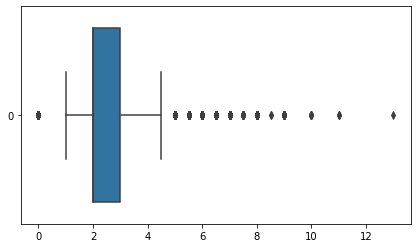

In [15]:
plt.figure(figsize=(7,4))
sb.boxplot(data=houses_synt2.bathrooms, orient='h')
plt.show()

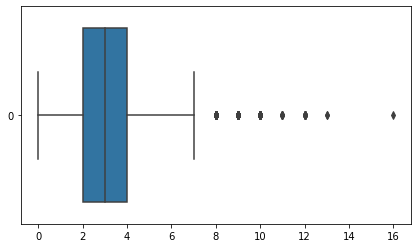

In [16]:
plt.figure(figsize=(7,4))
sb.boxplot(data=houses_synt2.bedrooms, orient='h')
plt.show()

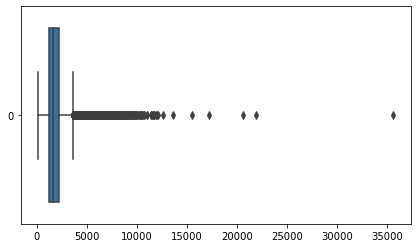

In [17]:
plt.figure(figsize=(7,4))
sb.boxplot(data=houses_synt2.habitable_sqft, orient='h')
plt.show()

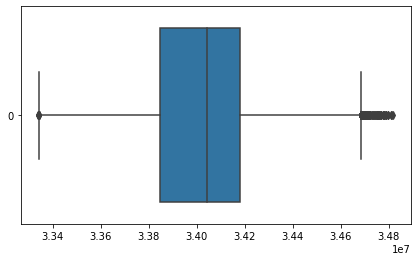

In [18]:
plt.figure(figsize=(7,4))
sb.boxplot(data=houses_synt2.latitude, orient='h')
plt.show()

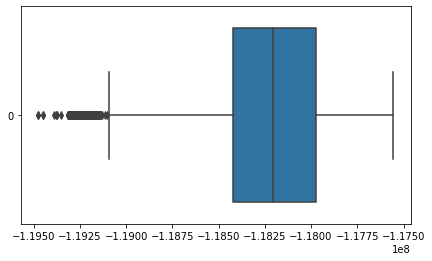

In [19]:
plt.figure(figsize=(7,4))
sb.boxplot(data=houses_synt2.longitude, orient='h')
plt.show()

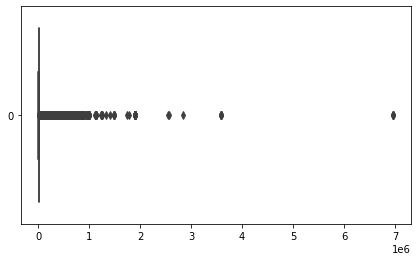

In [20]:
plt.figure(figsize=(7,4))
sb.boxplot(data=houses_synt2.lot_sqft, orient='h')
plt.show()

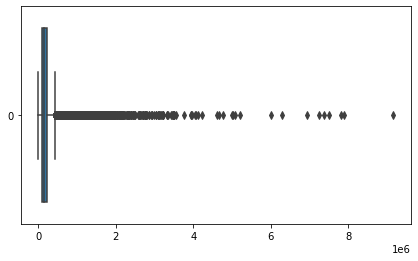

In [21]:
plt.figure(figsize=(7,4))
sb.boxplot(data=houses_synt2.building_tax_value, orient='h')
plt.show()

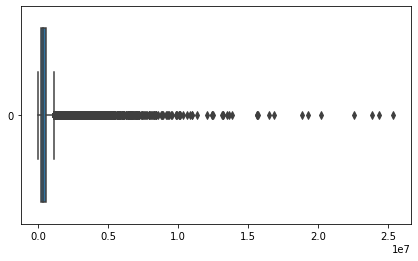

In [22]:
plt.figure(figsize=(7,4))
sb.boxplot(data=houses_synt2.parcel_tax_value, orient='h')
plt.show()

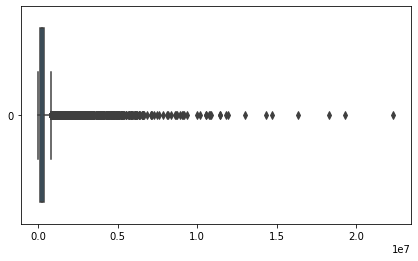

In [23]:
plt.figure(figsize=(7,4))
sb.boxplot(data=houses_synt2.land_tax_value, orient='h')
plt.show()

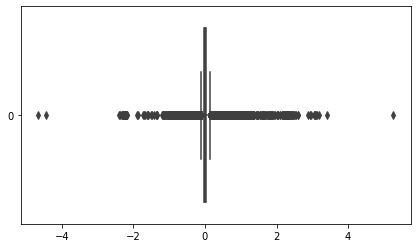

In [24]:
plt.figure(figsize=(7,4))
sb.boxplot(data=houses_synt2.logerror, orient='h')
plt.show()

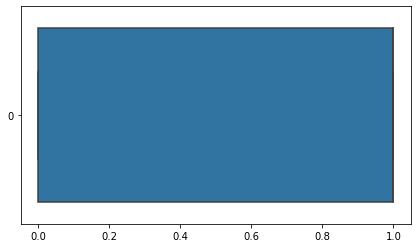

In [25]:
plt.figure(figsize=(7,4))
sb.boxplot(data=houses_synt2.Los_Angeles, orient='h')
plt.show()

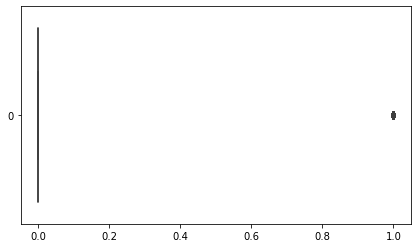

In [26]:
plt.figure(figsize=(7,4))
sb.boxplot(data=houses_synt2.Orange, orient='h')
plt.show()

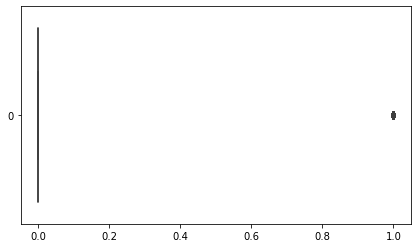

In [27]:
plt.figure(figsize=(7,4))
sb.boxplot(data=houses_synt2.Ventura, orient='h')
plt.show()

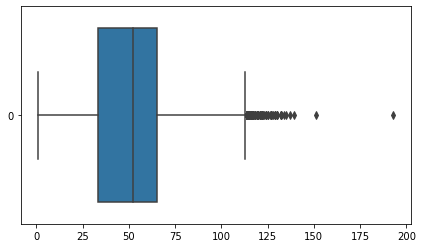

In [28]:
plt.figure(figsize=(7,4))
sb.boxplot(data=houses_synt2.age, orient='h')
plt.show()

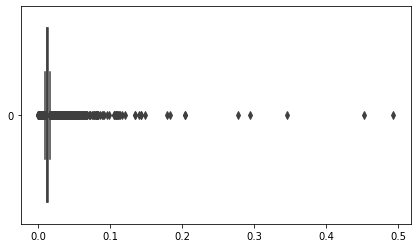

In [29]:
plt.figure(figsize=(7,4))
sb.boxplot(data=houses_synt2.tax_rate, orient='h')
plt.show()

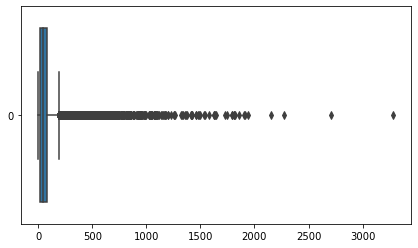

In [30]:
plt.figure(figsize=(7,4))
sb.boxplot(data=houses_synt2.value_per_sqft, orient='h')
plt.show()

**<font color = 'blue'>Takeaways and Actions</font>**

>All columns but Orange and Los Angeles have upper-bound outliers</font>

>All columns but logerror, longitude, bathrooms, and bedrooms have lower-bound outliers</font>

><font color = 'brown'>I will not remove outliers because most of them are not due to recording errors or are statistical abberation. Furthurmore, I am moving towards an MVP so I will try to remove them when I am done with the MVP</font>

>Split the data into train, validate, and test</font>

>Scale and explore</font>

****

# Exploration

**I will try to answer the following questions in my exploration phase**

>Is there a pattern in the data? Where?</font>

    
>What features are driving the logerror? What are the most prominent ones?</font>


>Is the impact of those features meaningful?</font>

**My objective is to use the variables or a combination of them to understand what drives logerror**

In [32]:
# Splitting the data into train, validate, test with split_scale

train, validate, test = split_scale.split_zillow(houses_synt2)

**Verifying the shape of the data below**

In [33]:
train.shape

(38664, 16)

In [34]:
validate.shape

(16571, 16)

In [35]:
test.shape

(13809, 16)

In [36]:
# Scaling the split data using MinMax Scaler through the split_scale module

train_scaled, validate_scaled, test_scaled = split_scale.min_max_scaler(train, validate, test)

**Verifying the shape of the data below**

In [37]:
train_scaled.shape

(38664, 16)

In [38]:
validate_scaled.shape

(16571, 16)

In [39]:
test_scaled.shape

(13809, 16)

In [40]:
# # Assigning the data to the variable necessary later for modeling

# # Creating X_train by dropping the target variable 
# X_train_scaled = train_scaled.drop(columns=['logerror'])
# # Creating y_train by keeping only the target variable.
# y_train_scaled = train_scaled[['logerror']]

# # Creating X_validate by dropping the target variable 
# X_validate_scaled = validate_scaled.drop(columns=['logerror'])
# # Creating y_validate by keeping only the target variable.
# y_validate_scaled = validate_scaled[['logerror']]

# # Creating X_test by dropping the target variable 
# X_test_scaled = test_scaled.drop(columns=['logerror'])
# # Creating y_test by keeping only the target variable.
# y_test_scaled = test_scaled[['logerror']]

array([[<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'habitable_sqft'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'lot_sqft'}>,
        <AxesSubplot:title={'center':'building_tax_value'}>,
        <AxesSubplot:title={'center':'parcel_tax_value'}>],
       [<AxesSubplot:title={'center':'land_tax_value'}>,
        <AxesSubplot:title={'center':'logerror'}>,
        <AxesSubplot:title={'center':'Los_Angeles'}>,
        <AxesSubplot:title={'center':'Orange'}>],
       [<AxesSubplot:title={'center':'Ventura'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'tax_rate'}>,
        <AxesSubplot:title={'center':'value_per_sqft'}>]], dtype=object)

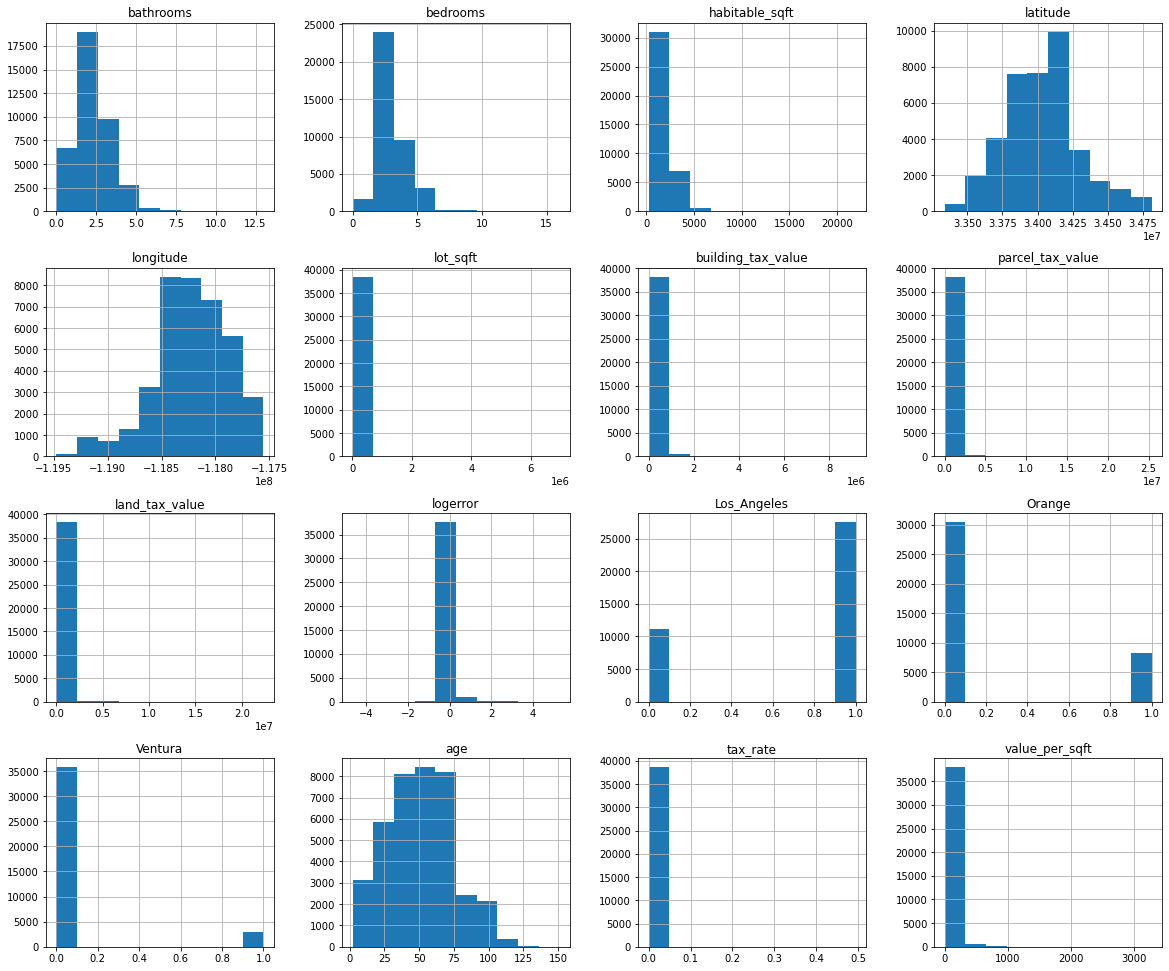

In [41]:
# Plotting histograms to visualize the data
train.hist(figsize=(20, 17))

**<font color = 'blue'>Observations</font>**

>**From univariate observation and the histograms above I can see that t he data distribution is all over the place**

>**Bathrooms, habitable_sqft, lot_sqft, building_tax_value, parcel_tax_value, land_tax_value, tax_amount, tax_rate, value_per_sqft, and logerror have the same right-skewed shape</font>**

>**Bedrooms, latitude, longitude and age have a pseudo-normal ditribution</font>**

**<font color = 'blue'>Questions and strategies</font>**

>Which variable correlate more to logerror? (plot all of them together)

>Which variable correlate more to each other in order to create more synthetic variables?

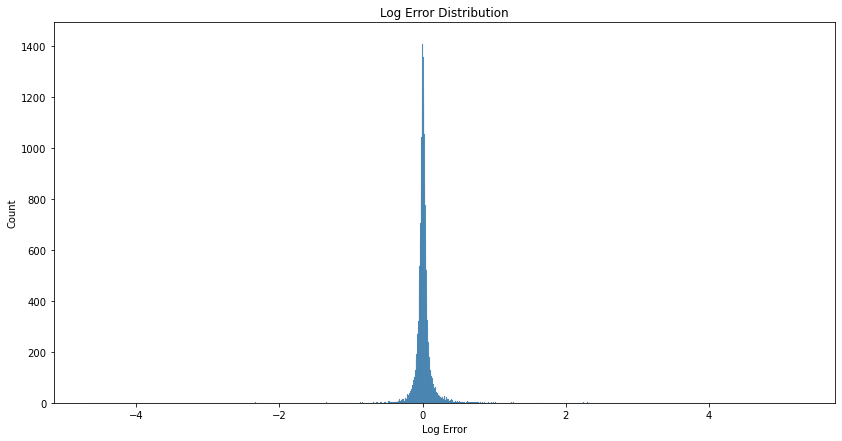

In [42]:
# Displaying the logerror distribution
plt.figure(figsize=(14, 7))

sb.histplot(train.logerror)
plt.title('Log Error Distribution', fontsize=12)
plt.xlabel('Log Error')

plt.show()

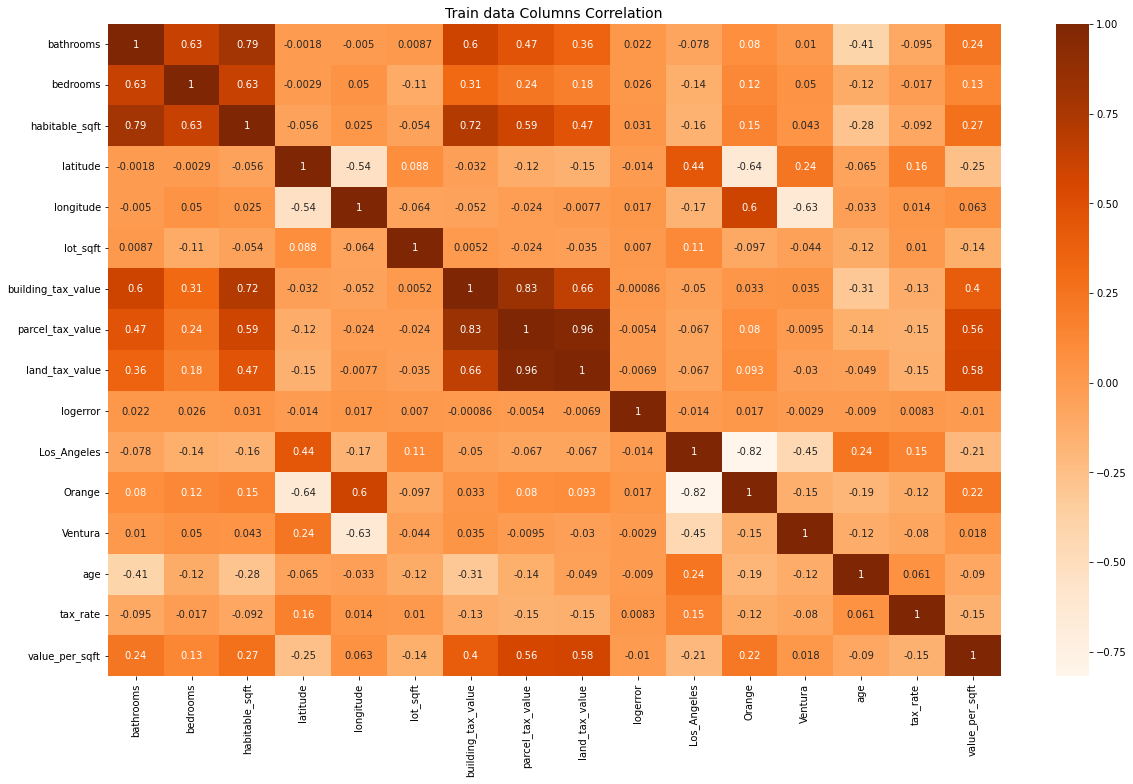

In [43]:
# Plotting a heatmap of the correlation between variables and the target logerror

plt.figure(figsize=(20, 12))
sb.heatmap(train.corr(), cmap='Oranges', annot=True)
plt.title('Train data Columns Correlation', fontsize=14)
plt.show()

In [44]:
# Displaying a general correlation to confirm the heatmap and have the numbers listed

train.corr().sort_values(by='logerror', ascending=False)

,bathrooms,bedrooms,habitable_sqft,latitude,longitude,lot_sqft,building_tax_value,parcel_tax_value,land_tax_value,logerror,Los_Angeles,Orange,Ventura,age,tax_rate,value_per_sqft
logerror,0.022479,0.026226,0.031132,-0.013846,0.017328,0.007000,-0.000864,-0.005372,-0.006895,1.000000,-0.014127,0.017467,-0.002857,-0.009023,0.008335,-0.010160
habitable_sqft,0.788528,0.626165,1.000000,-0.055849,0.025046,-0.053530,0.715564,0.591924,0.465707,0.031132,-0.163248,0.152995,0.042881,-0.284049,-0.092479,0.265475
bedrooms,0.628901,1.000000,0.626165,-0.002882,0.050130,-0.110325,0.311846,0.240052,0.178601,0.026226,-0.137301,0.119947,0.049627,-0.118691,-0.017457,0.131730
bathrooms,1.000000,0.628901,0.788528,-0.001771,-0.004961,0.008725,0.598465,0.473794,0.360581,0.022479,-0.078081,0.079882,0.010094,-0.411621,-0.095107,0.238562
Orange,0.079882,0.119947,0.152995,-0.639128,0.598046,-0.097285,0.032745,0.079759,0.092936,0.017467,-0.817821,1.000000,-0.147989,-0.191863,-0.119755,0.224425
longitude,-0.004961,0.050130,0.025046,-0.537292,1.000000,-0.063790,-0.052084,-0.023788,-0.007657,0.017328,-0.171409,0.598046,-0.634470,-0.033409,0.014309,0.062588
tax_rate,-0.095107,-0.017457,-0.092479,0.163612,0.014309,0.010208,-0.125477,-0.153186,-0.148826,0.008335,0.154527,-0.119755,-0.079530,0.060609,1.000000,-0.154027
lot_sqft,0.008725,-0.110325,-0.053530,0.088478,-0.063790,1.000000,0.005225,-0.024279,-0.035493,0.007000,0.113727,-0.097285,-0.044319,-0.119386,0.010208,-0.140504
building_tax_value,0.598465,0.311846,0.715564,-0.031985,-0.052084,0.005225,1.000000,0.832942,0.658615,-0.000864,-0.050067,0.032745,0.035175,-0.306851,-0.125477,0.396460
Ventura,0.010094,0.049627,0.042881,0.236759,-0.634470,-0.044319,0.035175,-0.009535,-0.029641,-0.002857,-0.448108,-0.147989,1.000000,-0.122412,-0.079530,0.017580


**<font color = 'blue'>Observations</font>**
>**It does not seem there is a strong meaningful relationship between the variables that I have**

>bathrooms, bedrooms, and habitable_sqft seem to correlate more to logerror

>age seem to correlate more with the number of bathrooms, bedrooms, habitable_sqft, and the location of the houses

>Logerror is normally distributed

**<font color = 'blue'>Strategies</font>**
>I will examine bathrooms, bedrooms, habitable_sqft, and the 2locations Los Angeles and Orange which have the highest correlation

**<font color = 'blue'>Questions</font>**

>1. Is bathrooms correlated to logerror?

>2. Is berooms correlated to logerror?

>3. Is habitable_sqft correlated to logerror?

>4. Is Los_Angeles correlated to logerror?

>5. Is Orange correlated to logerror?

## Bathrooms correlation to logerror

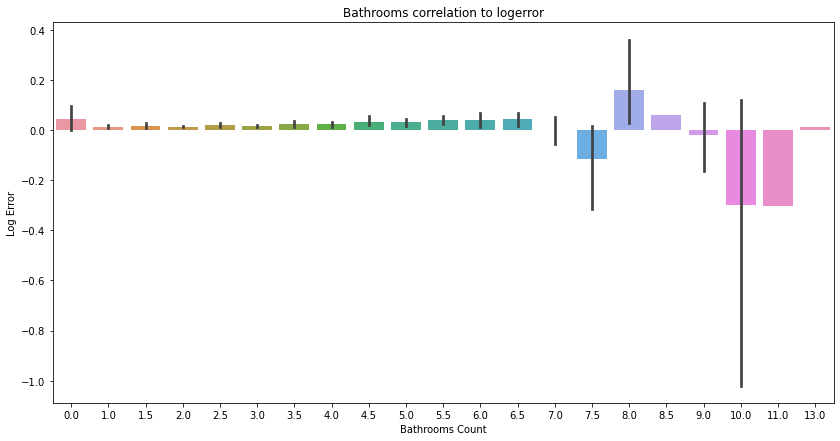

In [45]:
# Plotting a barplot with confidence line for bathrooms

plt.figure(figsize=(14,7))
with sb.color_palette('Blues'):
    sb.barplot(x='bathrooms', y='logerror', data=train)
plt.xlabel('Bathrooms Count')
plt.ylabel('Log Error')
plt.title('Bathrooms correlation to logerror')
plt.show()

**Homes with smaller bathroom counts (between 1 and 6) tend to produce smaller log error**
>There are major errors with 0, 7, 7.5, 8, 9, 10 and 11/13

>This could possibly be a driver of log error. I mark this feature for further investigation

## Bedrooms correlation to logerror

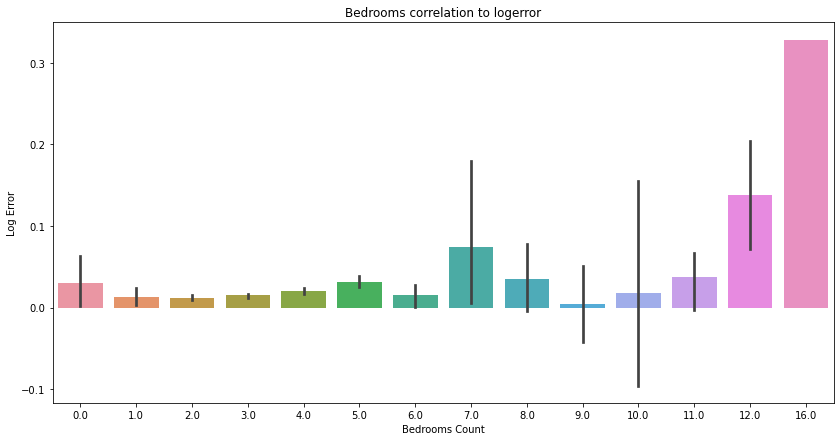

In [46]:
# Plotting a barplot with confidence line for bedrooms

plt.figure(figsize=(14,7))
with sb.color_palette('Blues'):
    sb.barplot(x='bedrooms', y='logerror', data=train)
plt.xlabel('Bedrooms Count')
plt.ylabel('Log Error')
plt.title('Bedrooms correlation to logerror')
plt.show()

**Homes with smaller bedroom counts (between 1 and 6) tend to produce smaller log error**
>There are major errors with 0, 7, 8, and 9

>This could possibly be a driver of log error. I mark this feature for further investigation

##  Habitable_sqft correlation to logerror

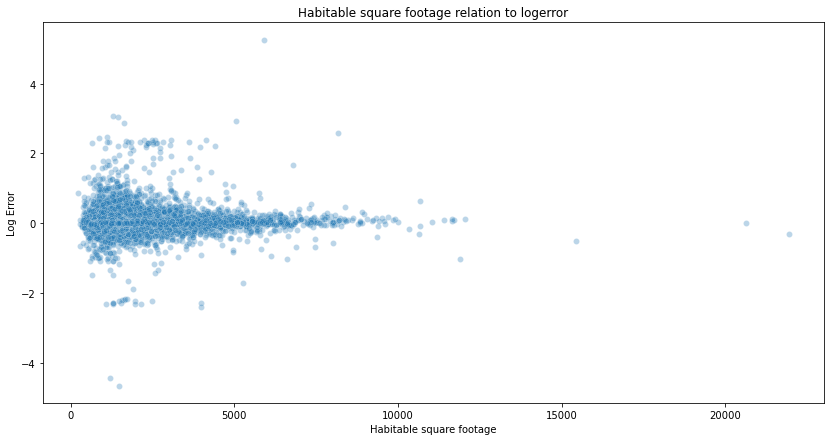

In [47]:
# Plotting a scatterplot with transparency alpha at .5 for habitable_sqft

plt.figure(figsize=(14,7))
sb.scatterplot(x='habitable_sqft', y='logerror', data=train, alpha=.3)
plt.xlabel('Habitable square footage')
plt.ylabel('Log Error')
plt.title('Habitable square footage relation to logerror')
plt.show()

## Plotting bar plots of Los_Angeles and Orange correlation to logerror

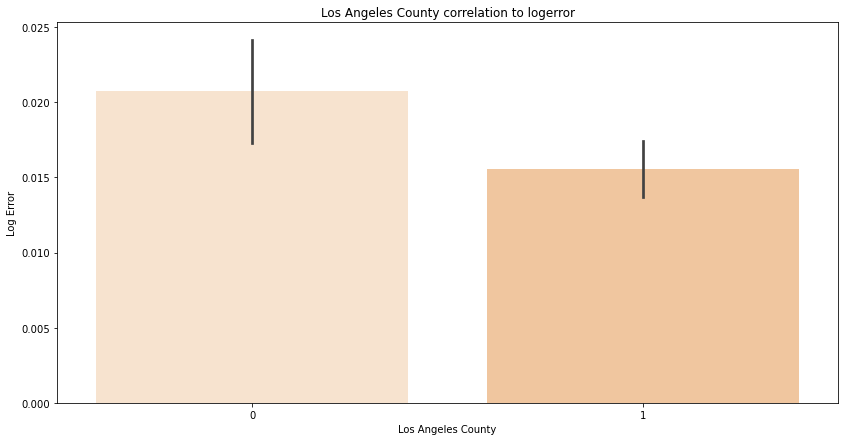

In [48]:
plt.figure(figsize=(14,7))
with sb.color_palette('Oranges'):
    sb.barplot(x='Los_Angeles', y='logerror', data=train)
plt.xlabel('Los Angeles County')
plt.ylabel('Log Error')
plt.title('Los Angeles County correlation to logerror')
plt.show()

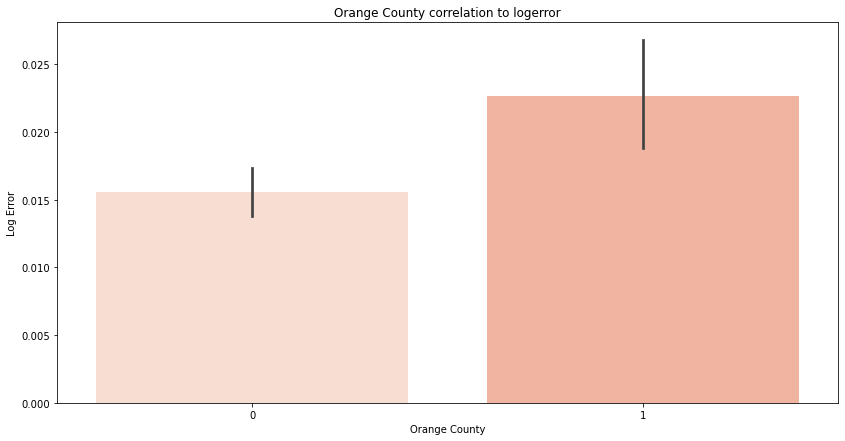

In [49]:

plt.figure(figsize=(14,7))
with sb.color_palette('Reds'):
    sb.barplot(x='Orange', y='logerror', data=train)
plt.xlabel('Orange County')
plt.ylabel('Log Error')
plt.title('Orange County correlation to logerror')
plt.show()

**Los_Angeles and Orange seem to have an opposite realtionship with log error**
>Los_Angeles induces almost less than half the errors

>On the other hand, Orange seem to drive up errors

**<font color = 'blue'>Observations</font>**

>All the features above seem to have some sort of impact on logerror

>I will investigate them further using statistical tests

**<font color = 'blue'>Strategies</font>**

>**Assumptions**

>Target variable logerror is normally distributed and is continuous

>bathrooms, bedrooms are close to normal distributions and with the amount of data they can be considered normal, they are ordinal discrete, presence of a great number of outliers ====> Pearson's r (because of the size of the data)

>habitable_sqft right-skewed and continuous, presence of great number of outliers ====> I would use a non parametric test (Spearman) but the distribution is non monotonic ====> Pearson

>Los_Angeles is dichotomous ====> pointbiserial 

>Orange is categorical and discrete ====> pointbiserial

## Bathrooms

In [50]:
# Setting alpha for all the tests that need it

α = .05

In [51]:
# Assigning train_scaled.bathrooms and train_scaled.logerror to x and y
x = train_scaled.bathrooms
y = train_scaled.logerror

alternative_hypothesis = 'Bathroom count is correlated to logerror'

corr, p = stats.pearsonr(x, y)

print(corr, p)

if p < α:
    print('I reject the null hypothesis')
    print('I can say that I have confidence that', alternative_hypothesis)
else:
    print('I fail to reject the null hypothesis')

0.022478603713171428 9.850916520779537e-06
I reject the null hypothesis
I can say that I have confidence that Bathroom count is correlated to logerror


## Bedrooms

In [52]:
# Assigning train_scaled.bedrooms and train_scaled.logerror to a different x and y to avoid mix ups

x2 = train_scaled.bedrooms
y2 = train_scaled.logerror

alternative_hypothesis = 'Bedroom count is correlated to logerror'

corr2, p2 = stats.pearsonr(x2, y2)

print(corr2, p2)

if p2 < α:
    print('I reject the null hypothesis')
    print('I can say that I have confidence that', alternative_hypothesis)
else:
    print('I fail to reject the null hypothesis')

0.026226487726064212 2.5003175532344015e-07
I reject the null hypothesis
I can say that I have confidence that Bedroom count is correlated to logerror


## Habitable square footage

In [53]:
# Assigning train_scaled.habitable_sqft and train_scaled.logerror to a different x and y to avoid mix ups

x3 = train_scaled.habitable_sqft
y3 = train_scaled.logerror

alternative_hypothesis = 'habitable_sqft is correlated to logerror'

corr3, p3 = stats.pearsonr(x3, y3)

print(corr3, p3)

if p3 < α:
    print('I reject the null hypothesis')
    print('I can say that I have confidence that', alternative_hypothesis)
else:
    print('I fail to reject the null hypothesis')

0.03113189778781502 9.194390473053868e-10
I reject the null hypothesis
I can say that I have confidence that habitable_sqft is correlated to logerror


## Los Angeles

In [54]:
# Assigning train_scaled.Los_Angeles and train_scaled.logerror to a different x and y to avoid mix ups

x4 = train_scaled.Los_Angeles
y4 = train_scaled.logerror


alternative_hypothesis = 'Los Angeles is correlated to logerror'

corr4, p4 = stats.pointbiserialr(x4, y4)

print(corr4, p4)

if p4 < α:
    print('I reject the null hypothesis')
    print('I can say that I have confidence that', alternative_hypothesis)
else:
    print('I fail to reject the null hypothesis')

-0.014126930031169204 0.0054719847418286584
I reject the null hypothesis
I can say that I have confidence that Los Angeles is correlated to logerror


## Orange

In [55]:
# Assigning train_scaled.Orange and train_scaled.logerror to a different x and y to avoid mix ups

x5 = train_scaled.Orange
y5 = train_scaled.logerror

alternative_hypothesis = 'Orange is correlated to logerror'

corr5, p5 = stats.pointbiserialr(x5, y5)

print(corr5, p5)

if p5 < α:
    print('I reject the null hypothesis')
    print('I can say that I have confidence that', alternative_hypothesis)
else:
    print('I fail to reject the null hypothesis')

0.017467145299131803 0.0005931131620774839
I reject the null hypothesis
I can say that I have confidence that Orange is correlated to logerror


**<font color = 'blue'>Observations</font>**

>I can say with confidence that despite the low correlation percentage, all the features above have a strong correlation with very low p-values

>I will go forward and try to find meaningful clusters

****

# Clustering
**<font color = 'blue'>Features were grouped into 4 categories:</font>**
>Physical position: latitude, longitude, Los_Angeles, Orange, Ventura

>Value: building_tax_value, parcel_tax_value, land_tax_value, tax_rate, value_per_sqft

>Home features: bathrooms, bedrooms, lot_sqft

In [56]:
# List of variables I will cluster on with the cluster name
# to use in the clustering function and the centroid column name and code
cluster_vars = train_scaled[['latitude', 'longitude', 'Los_Angeles', 'Orange', 'Ventura']]
cluster_name = 'location_cluster'
centroid_col_names = ['centroid_' + i for i in cluster_vars]

In [57]:
# List of variables I will cluster on with the cluster name
# to use in the clustering function and the centroid column name and code
cluster_vars2 = train_scaled[['building_tax_value',
                              'parcel_tax_value',
                              'land_tax_value',
                              'tax_rate',
                              'value_per_sqft']]
cluster_name2 = 'value_cluster'
centroid_col_names2 = ['centroid_' + i for i in cluster_vars2]

In [58]:
# List of variables I will cluster on with the cluster name
# to use in the clustering function and the centroid column name and code
cluster_vars3 = train_scaled[['bathrooms', 'bedrooms', 'lot_sqft']]
cluster_name3 = 'home_cluster'
centroid_col_names3 = ['centroid_' + i for i in cluster_vars3]

   k          sse
0  2  6734.942356
1  3  1086.511548
2  4   663.041125
3  5   479.754000
4  6   354.250188
5  7   290.431931
6  8   229.497566
7  9   203.662822


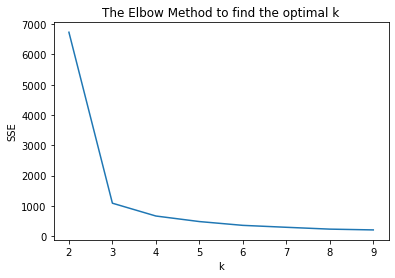

In [59]:
# Displaying the elbow ,ethod findings for cluster_vars
# (the optimal k value for the best cluster possible)

optimal_k = cluster_model.elbow_method(cluster_vars)

**I pick k=4**

   k        sse
0  2  67.632347
1  3  51.508738
2  4  42.632392
3  5  36.473009
4  6  32.642855
5  7  29.067883
6  8  26.507679
7  9  24.521943


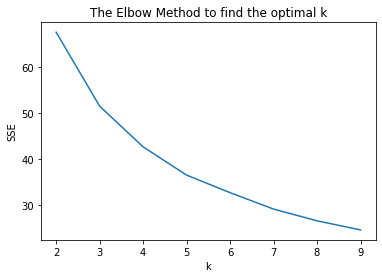

In [60]:
# Displaying the elbow ,ethod findings for cluster_vars2
# (the optimal k value for the best cluster possible)

optimal_k2 = cluster_model.elbow_method(cluster_vars2)

**I pick k=5**

   k         sse
0  2  244.745846
1  3  176.841240
2  4  137.954151
3  5  115.354717
4  6   97.135080
5  7   83.829916
6  8   72.061863
7  9   60.530139


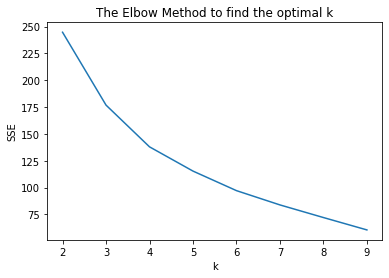

In [61]:
# Displaying the elbow ,ethod findings for cluster_vars3
# (the optimal k value for the best cluster possible)

optimal_k3 = cluster_model.elbow_method(cluster_vars3)

**I pick k=5**

**<font color = 'blue'>Takeaways of clustering</font>**

>**The value cluster seems to perform the best**

>**I will use it going forward**

>**When using the value cluster I will be applying a k=5 because it this is where the change remains significant on the elbow curve**

>**I will go forward and assign this group to the clustering function**

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38664 entries, 14225 to 35766
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bathrooms           38664 non-null  float64
 1   bedrooms            38664 non-null  float64
 2   habitable_sqft      38664 non-null  float64
 3   latitude            38664 non-null  float64
 4   longitude           38664 non-null  float64
 5   lot_sqft            38664 non-null  float64
 6   building_tax_value  38664 non-null  float64
 7   parcel_tax_value    38664 non-null  float64
 8   land_tax_value      38664 non-null  float64
 9   logerror            38664 non-null  float64
 10  Los_Angeles         38664 non-null  uint8  
 11  Orange              38664 non-null  uint8  
 12  Ventura             38664 non-null  uint8  
 13  age                 38664 non-null  float64
 14  tax_rate            38664 non-null  float64
 15  value_per_sqft      38664 non-null  float64
dtype

In [63]:
# train_clusters, validate_clusters, test_clusters, cluster_counts = cluster_model.get_clusters(5, cluster_vars,
#                                                                                               cluster_name,
#                                                                                               train_scaled,
#                                                                                               validate_scaled,
#                                                                                               test_scaled)